In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(48895, 16)

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


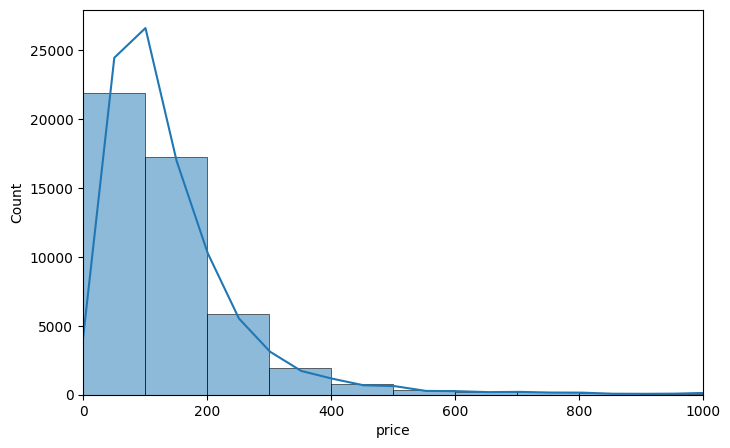

In [ ]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=100,kde=True)
plt.xlim(0,1000)
plt.show()


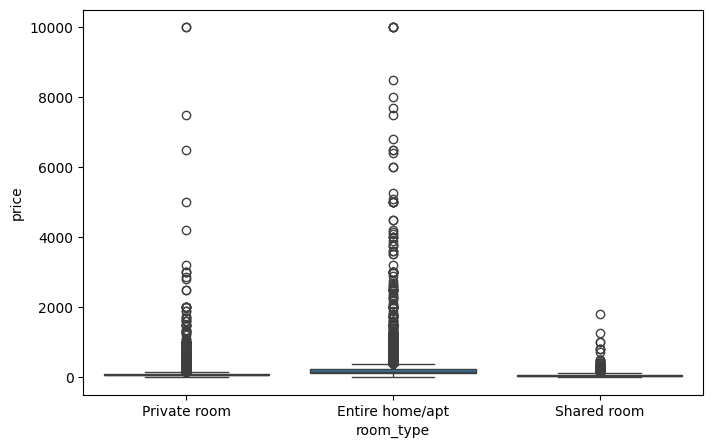

In [ ]:
# price vs room type
plt.figure(figsize=(8,5))
sns.boxplot(y = 'price',x ='room_type', data=df)
plt.show()


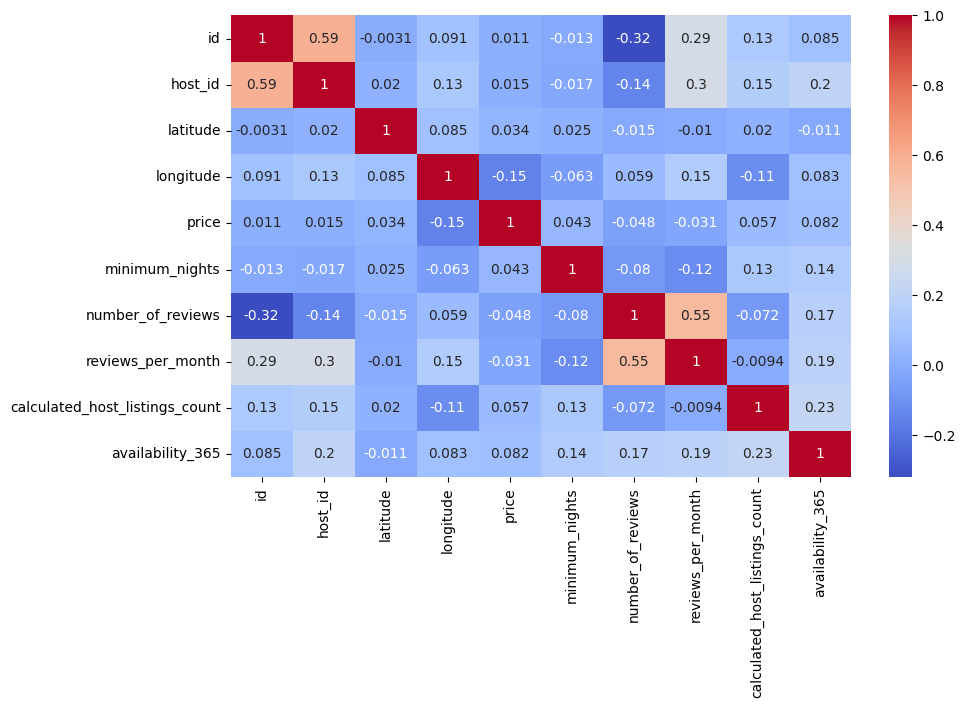

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=np.number) # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
#data cleaning
df = df[df['price']<1000]

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df = df.drop(['id','name','host_name'], axis=1)

In [ ]:
df = df.drop(['last_review'], axis=1)

In [ ]:
# One-hot encode categorical features
df = pd.get_dummies(df,columns=['neighbourhood_group','neighbourhood','room_type'], drop_first=True)

In [ ]:
# Select features and target
X = df.drop(['price'],axis =1)
y = np.log1p(df['price']) # Price distribution highly skewed hai so that i use Log Transformation --> Large numbers ko compress karna.



# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [ ]:
X = X.fillna(X.mean())

In [ ]:
#  Feature transformation (log transform for skewed features)
for col in X.select_dtypes(include=['float64', 'int64']).columns:
    if X[col].skew() > 1:
        # Replace NaN with 0 before log transform
        X[col] = np.nan_to_num(X[col], nan=0)
        X[col] = np.log1p(X[col])  # log(1+x) transformation

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)


y_pred = reg.predict(X_test)
y_pred_original = np.expm1(y_pred)  # inverse of log1p --> Matlab predictions ko wapas original scale  le aana.
y_test_original = np.expm1(y_test)     # test target ko bhi inverse karo

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_original,y_pred_original)

In [ ]:
r2

0.36414758470228725

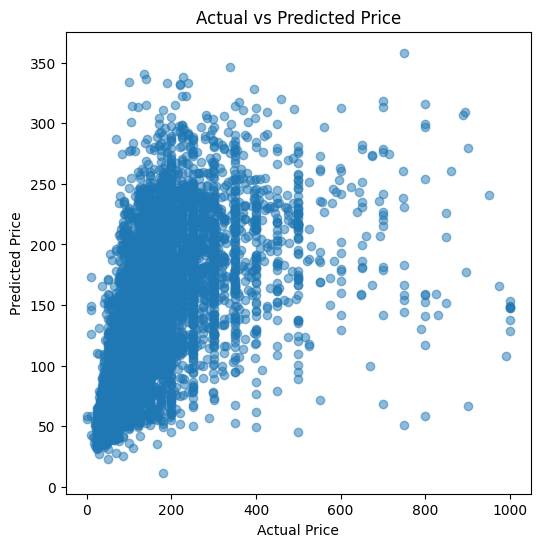

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


In [ ]:
# using ridge regression
from sklearn.linear_model import Ridge

In [ ]:
rig = Ridge(alpha =1.0)
rig.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.35046e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Ridge()

In [ ]:
rig_pred = rig.predict(X_test)

In [ ]:
r2_ridge = r2_score(y_test,rig_pred)

In [ ]:
print("r2_ridge:",r2_ridge)

r2_ridge: 0.5719202802473033


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.01,max_iter = 200)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=200)

In [ ]:
lasso_pred  = lasso.predict(X_test)

In [ ]:
r2_lasso = r2_score(y_test,lasso_pred)

In [ ]:
print("r2_lasso",r2_lasso)

r2_lasso 0.4926850430022488
